# **Air Pollution Prediction - PBL**

## TE COMP B - GROUP 1 - Track 5

###### Prerak Khandelwal - 22
###### Deep Kothari - 23
###### Jenil Mandavia - 30
###### Siddhesh Marketkar - 32

## Importing Libraries

In [ ]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Dataset

In [ ]:
df = pd.read_csv("/content/city_day.csv")

In [ ]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [ ]:
df.shape

(29531, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


## Missing values

In [ ]:
# We drop the Xylene column as it has too many NULL values
# Dropping rows containing null values in AQI, CO
df.dropna(subset = ['AQI', 'CO'], inplace = True)
df.drop(['Xylene'],axis = 1, inplace = True)

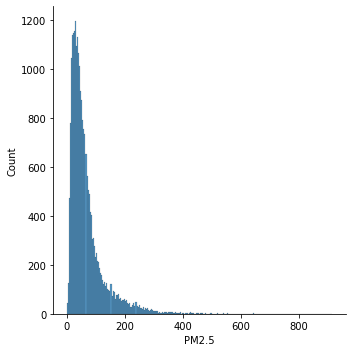

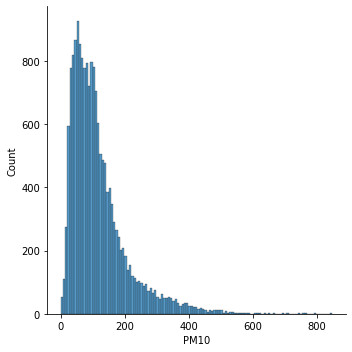

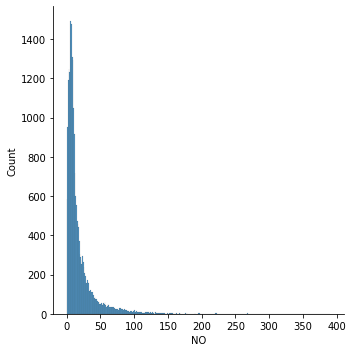

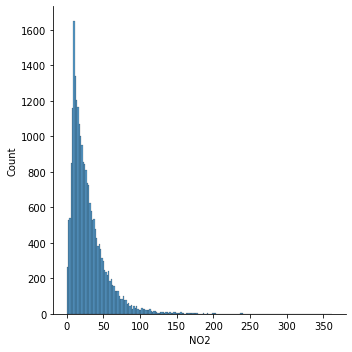

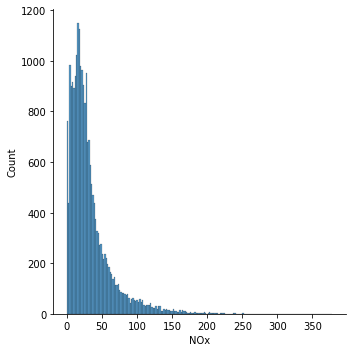

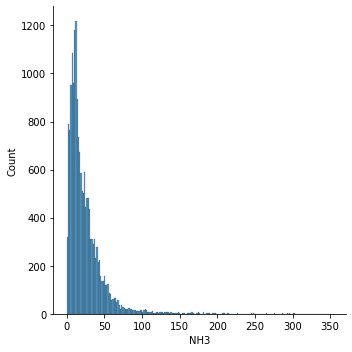

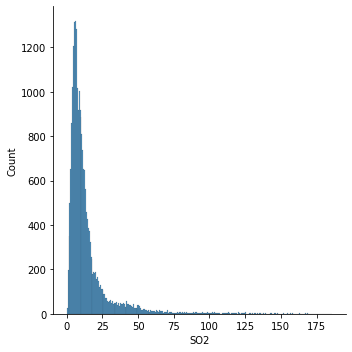

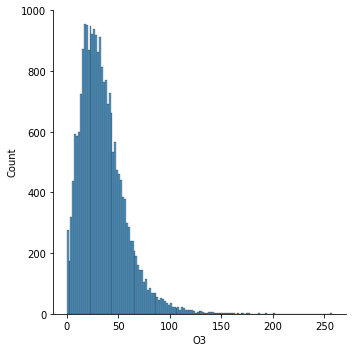

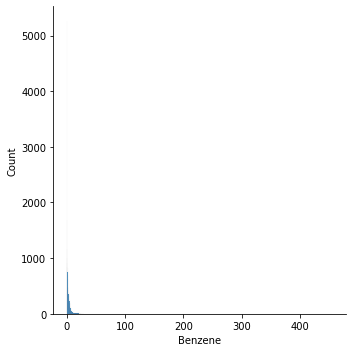

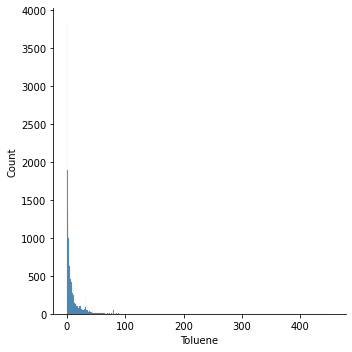

In [ ]:
# Data Visualization - Dist Plot for finding way of imputing missing values
sns.displot(df['PM2.5']) 
sns.displot(df['PM10']) 
sns.displot(df['NO'])
sns.displot(df['NO2'])
sns.displot(df['NOx']) 
sns.displot(df['NH3']) 
sns.displot(df['SO2'])
sns.displot(df['O3'])
sns.displot(df['Benzene'])
sns.displot(df['Toluene'])

In [ ]:
# Replacing Missing values with mode in column
for column in ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'O3', 'Benzene', 'Toluene']:
    df[column] = df[column].fillna(df[column].mode()[0])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24405 entries, 28 to 29530
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        24405 non-null  object 
 1   Date        24405 non-null  object 
 2   PM2.5       24405 non-null  float64
 3   PM10        24405 non-null  float64
 4   NO          24405 non-null  float64
 5   NO2         24405 non-null  float64
 6   NOx         24405 non-null  float64
 7   NH3         24405 non-null  float64
 8   CO          24405 non-null  float64
 9   SO2         24405 non-null  float64
 10  O3          24405 non-null  float64
 11  Benzene     24405 non-null  float64
 12  Toluene     24405 non-null  float64
 13  AQI         24405 non-null  float64
 14  AQI_Bucket  24405 non-null  object 
dtypes: float64(12), object(3)
memory usage: 3.0+ MB


In [ ]:
df.shape

(24405, 15)

## Data Preprocessing

In [ ]:
# We extract out the year and month data
def preprocessing(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = [d.year for d in df['Date']]
    df['Month'] = [d.month for d in df['Date']]
    del df['Date']
    return df

In [ ]:
preprocessing(df)

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket,Year,Month
28,Ahmedabad,83.13,94.00,6.93,28.71,33.72,10.46,6.93,49.52,59.76,0.02,0.00,209.0,Poor,2015,1
29,Ahmedabad,79.84,94.00,13.85,28.68,41.08,10.46,13.85,48.49,97.07,0.04,0.00,328.0,Very Poor,2015,1
30,Ahmedabad,94.52,94.00,24.39,32.66,52.61,10.46,24.39,67.39,111.33,0.24,0.01,514.0,Severe,2015,1
31,Ahmedabad,135.99,94.00,43.48,42.08,84.57,10.46,43.48,75.23,102.70,0.40,0.04,782.0,Severe,2015,2
32,Ahmedabad,178.33,94.00,54.56,35.31,72.80,10.46,54.56,55.04,107.38,0.46,0.06,914.0,Severe,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,41.0,Good,2020,6
29527,Visakhapatnam,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,70.0,Satisfactory,2020,6
29528,Visakhapatnam,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,68.0,Satisfactory,2020,6
29529,Visakhapatnam,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,54.0,Satisfactory,2020,6


## Encoding Categorical Variables

In [ ]:
#List of cities for which we have the data
cities = df['City'].unique()
cities

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

##### Sturge’s Rule
###### K = 1 + 3. 322 logN
###### where:
###### K = number of class intervals (bins).
###### N = number of observations in the set.
###### log = logarithm of the number.

In [ ]:
# Binning
City_Table = df.groupby('City').agg({'AQI':'mean'}).sort_values('AQI',ascending = True)

In [ ]:
# Creating 10 bins
City_Table['City_Group'] = pd.cut(City_Table['AQI'], bins = 6,
                                    labels = ['A',
                                              'B',
                                              'C',
                                              'D',
                                              'E',
                                              'F'] , 
                                    include_lowest = True)

In [ ]:
City_Table = City_Table.drop(columns = 'AQI')

In [ ]:
df = pd.merge(df, City_Table, left_on='City', how = 'left', right_index=True)

In [ ]:
df = df.drop(columns = 'City')

In [ ]:
df

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket,Year,Month,City_Group
28,83.13,94.00,6.93,28.71,33.72,10.46,6.93,49.52,59.76,0.02,0.00,209.0,Poor,2015,1,F
29,79.84,94.00,13.85,28.68,41.08,10.46,13.85,48.49,97.07,0.04,0.00,328.0,Very Poor,2015,1,F
30,94.52,94.00,24.39,32.66,52.61,10.46,24.39,67.39,111.33,0.24,0.01,514.0,Severe,2015,1,F
31,135.99,94.00,43.48,42.08,84.57,10.46,43.48,75.23,102.70,0.40,0.04,782.0,Severe,2015,2,F
32,178.33,94.00,54.56,35.31,72.80,10.46,54.56,55.04,107.38,0.46,0.06,914.0,Severe,2015,2,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,41.0,Good,2020,6,B
29527,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,70.0,Satisfactory,2020,6,B
29528,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,68.0,Satisfactory,2020,6,B
29529,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,54.0,Satisfactory,2020,6,B


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24405 entries, 28 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   PM2.5       24405 non-null  float64 
 1   PM10        24405 non-null  float64 
 2   NO          24405 non-null  float64 
 3   NO2         24405 non-null  float64 
 4   NOx         24405 non-null  float64 
 5   NH3         24405 non-null  float64 
 6   CO          24405 non-null  float64 
 7   SO2         24405 non-null  float64 
 8   O3          24405 non-null  float64 
 9   Benzene     24405 non-null  float64 
 10  Toluene     24405 non-null  float64 
 11  AQI         24405 non-null  float64 
 12  AQI_Bucket  24405 non-null  object  
 13  Year        24405 non-null  int64   
 14  Month       24405 non-null  int64   
 15  City_Group  24405 non-null  category
dtypes: category(1), float64(12), int64(2), object(1)
memory usage: 3.0+ MB


## Outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


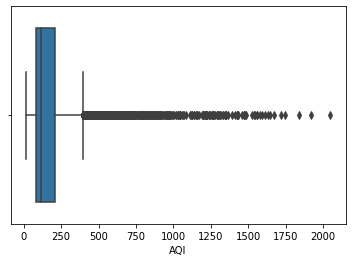

In [ ]:
# Box Plot
sns.boxplot(df['AQI'])

In [ ]:
# Position of the Outlier
a = np.where(df['AQI']>500)
print(np.size(a))

534


In [ ]:
df = df[df['AQI'] <= 500]

In [ ]:
df.shape

(23871, 16)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


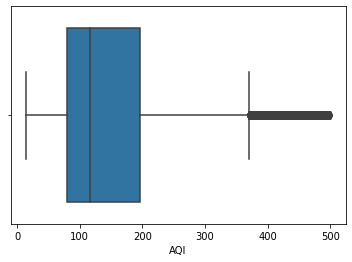

In [ ]:
# Box Plot
sns.boxplot(df['AQI'])

In [ ]:
# For city, we will perform OneHotEncoder
df = pd.get_dummies(df, columns = ['City_Group'], drop_first=True)
df

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket,Year,Month,City_Group_B,City_Group_C,City_Group_D,City_Group_E,City_Group_F
28,83.13,94.00,6.93,28.71,33.72,10.46,6.93,49.52,59.76,0.02,0.00,209.0,Poor,2015,1,0,0,0,0,1
29,79.84,94.00,13.85,28.68,41.08,10.46,13.85,48.49,97.07,0.04,0.00,328.0,Very Poor,2015,1,0,0,0,0,1
34,80.65,94.00,2.37,22.83,24.00,10.46,2.37,25.73,47.30,0.00,0.00,294.0,Poor,2015,2,0,0,0,0,1
35,58.36,94.00,2.60,21.39,23.31,10.46,2.60,32.66,53.54,0.00,0.00,149.0,Moderate,2015,2,0,0,0,0,1
36,79.29,94.00,1.16,26.94,26.83,10.46,1.16,67.41,59.30,0.00,0.00,190.0,Moderate,2015,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,41.0,Good,2020,6,1,0,0,0,0
29527,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,70.0,Satisfactory,2020,6,1,0,0,0,0
29528,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,68.0,Satisfactory,2020,6,1,0,0,0,0
29529,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,54.0,Satisfactory,2020,6,1,0,0,0,0


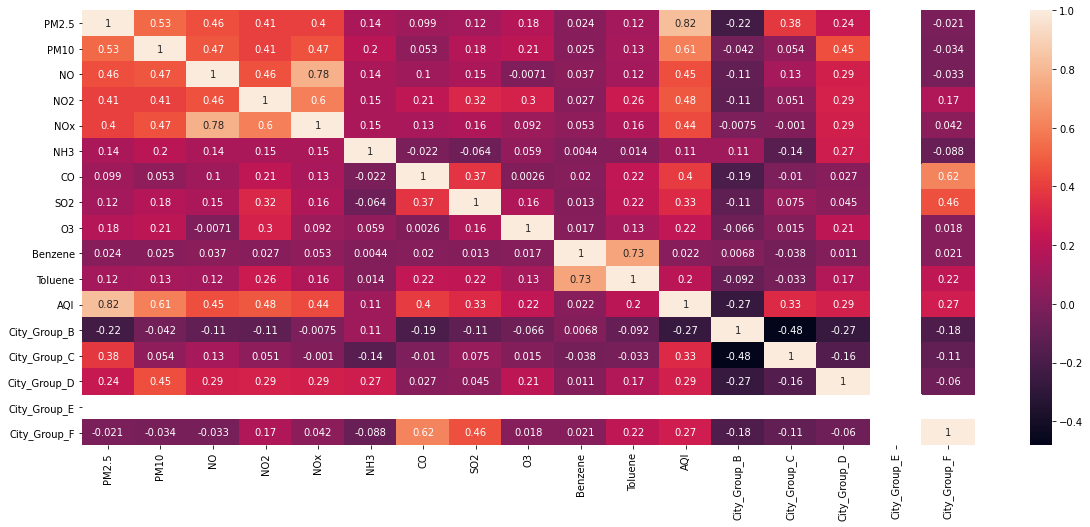

In [ ]:
df_corr = df.corr()
df_corr = df_corr.drop(['Year','Month'],axis = 1)
df_corr = df_corr.drop(['Year','Month'],axis = 0)
plt.figure(figsize=(20,8))
ax = sns.heatmap(df_corr, annot=True)

### AQI values into six categories based on the value namely: Good(0–50), Satisfactory (51–100), Moderate (101–200), Poor (201–300), Very Poor (301–400), Severe (above 400)

In [ ]:
df['AQI_Bucket'].unique()

array(['Poor', 'Very Poor', 'Moderate', 'Severe', 'Satisfactory', 'Good'],
      dtype=object)

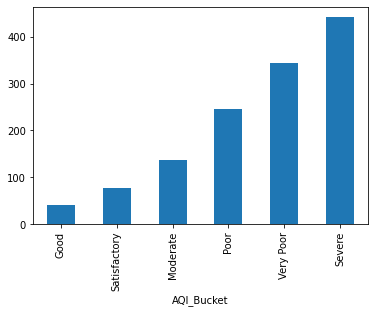

In [ ]:
df.groupby('AQI_Bucket')['AQI'].mean().sort_values().plot(kind = 'bar')

In [ ]:
del df['AQI_Bucket']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23871 entries, 28 to 29530
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PM2.5         23871 non-null  float64
 1   PM10          23871 non-null  float64
 2   NO            23871 non-null  float64
 3   NO2           23871 non-null  float64
 4   NOx           23871 non-null  float64
 5   NH3           23871 non-null  float64
 6   CO            23871 non-null  float64
 7   SO2           23871 non-null  float64
 8   O3            23871 non-null  float64
 9   Benzene       23871 non-null  float64
 10  Toluene       23871 non-null  float64
 11  AQI           23871 non-null  float64
 12  Year          23871 non-null  int64  
 13  Month         23871 non-null  int64  
 14  City_Group_B  23871 non-null  uint8  
 15  City_Group_C  23871 non-null  uint8  
 16  City_Group_D  23871 non-null  uint8  
 17  City_Group_E  23871 non-null  uint8  
 18  City_Group_F  23871 non-n

## Splitting data

In [ ]:
X = df.drop(["AQI"], axis=1)
y = df['AQI']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

## Model evaluation function

In [ ]:
from sklearn import metrics
def Model_evaluate(y_pred, y_test):
  print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
  print('MSE:', metrics.mean_squared_error(y_test, y_pred))
  print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
  print("R-squared value: ", metrics.r2_score(y_test, y_pred))

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_train_pred = lr.predict(X_train)

In [ ]:
y_pred

array([133.56112312, 151.03200218, 126.87162024, ...,  51.58501532,
       214.11190627,  76.7627411 ])

In [ ]:
Model_evaluate(y_train_pred, y_train)

MAE: 26.6902122332455
MSE: 1554.1315562063546
RMSE: 39.422475267369435
R-squared value:  0.8510644089682802


In [ ]:
Model_evaluate(y_pred, y_test)

MAE: 26.254919217938614
MSE: 1718.11081778214
RMSE: 41.45010033500691
R-squared value:  0.8369370301020176


## Standard Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

## KNN Regressor

In [ ]:
from sklearn import neighbors
from math import sqrt

In [ ]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    error = sqrt(metrics.mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 40.16026271789915
RMSE value for k=  2 is: 36.6190227508208
RMSE value for k=  3 is: 34.85446013793199
RMSE value for k=  4 is: 34.41206393082312
RMSE value for k=  5 is: 34.17417940814227
RMSE value for k=  6 is: 34.01741572233007
RMSE value for k=  7 is: 34.055339588729495
RMSE value for k=  8 is: 34.09059784246302
RMSE value for k=  9 is: 34.0933152753965
RMSE value for k=  10 is: 34.12691627820606
RMSE value for k=  11 is: 34.222096308235884
RMSE value for k=  12 is: 34.20717445048597
RMSE value for k=  13 is: 34.26855429275005
RMSE value for k=  14 is: 34.35042063185271
RMSE value for k=  15 is: 34.547724076410624
RMSE value for k=  16 is: 34.62378203955358
RMSE value for k=  17 is: 34.6230484814684
RMSE value for k=  18 is: 34.689674919048606
RMSE value for k=  19 is: 34.73137423669002
RMSE value for k=  20 is: 34.8219084314212


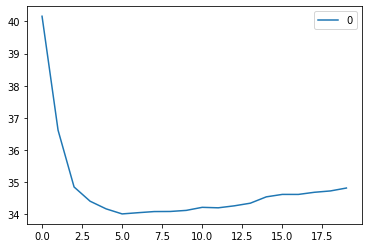

In [ ]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

When we take k=1, we get a high RMSE value. The RMSE value decreases as we increase the k value. At k= 6, the RMSE is approximately 34.01 , and shoots up on further increasing the k value.
We can safely say that k=6 will give us the best result in this case

In [ ]:
model = neighbors.KNeighborsRegressor(n_neighbors = 6)
model.fit(X_train, y_train)  #fit the model

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                    weights='uniform')

In [ ]:
y_pred = model.predict(X_test) #make prediction on test set
y_train_pred = model.predict(X_train)#make prediction on train set

In [ ]:
Model_evaluate(y_train_pred, y_train)

MAE: 16.933031350370058
MSE: 743.1386546920821
RMSE: 27.26056959588486
R-squared value:  0.928783509791634


In [ ]:
Model_evaluate(y_pred, y_test)

MAE: 20.843071553228622
MSE: 1157.184572425829
RMSE: 34.01741572233007
R-squared value:  0.8901735841792429


## Extra Trees Regressor

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()
etr.fit(X_train, y_train)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [ ]:
y_pred = etr.predict(X_test)
y_train_pred = etr.predict(X_train)

In [ ]:
Model_evaluate(y_train_pred, y_train)

MAE: 0.0021575198994553827
MSE: 0.044015500628403856
RMSE: 0.20979871455374519
R-squared value:  0.9999957819049652


In [ ]:
Model_evaluate(y_pred, y_test)

MAE: 16.787058638743456
MSE: 740.0186671884816
RMSE: 27.203284125055223
R-squared value:  0.9297660893565239


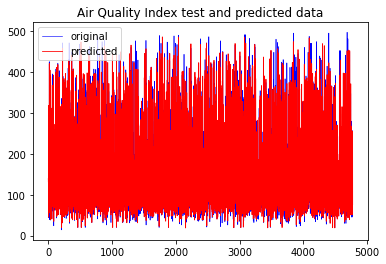

In [ ]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, lw=0.6, color="blue", label="original")
plt.plot(x_ax, y_pred, lw=0.8, color="red", label="predicted")
plt.title("Air Quality Index test and predicted data")
plt.legend()
plt.show()

## Hyperparameter Tuning - Extra Trees Regressor

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

In [ ]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'min_samples_split': min_samples_split}

In [ ]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
extr_random = RandomizedSearchCV(estimator = etr, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [ ]:
extr_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=15, max_features=auto .......


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=15, max_features=auto, total=  31.7s
[CV] n_estimators=900, min_samples_split=15, max_features=auto .......


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   31.7s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=15, max_features=auto, total=  31.0s
[CV] n_estimators=900, min_samples_split=15, max_features=auto .......
[CV]  n_estimators=900, min_samples_split=15, max_features=auto, total=  31.0s
[CV] n_estimators=900, min_samples_split=15, max_features=auto .......
[CV]  n_estimators=900, min_samples_split=15, max_features=auto, total=  30.9s
[CV] n_estimators=900, min_samples_split=15, max_features=auto .......
[CV]  n_estimators=900, min_samples_split=15, max_features=auto, total=  31.2s
[CV] n_estimators=1200, min_samples_split=15, max_features=auto ......
[CV]  n_estimators=1200, min_samples_split=15, max_features=auto, total=  41.7s
[CV] n_estimators=1200, min_samples_split=15, max_features=auto ......
[CV]  n_estimators=1200, min_samples_split=15, max_features=auto, total=  41.3s
[CV] n_estimators=1200, min_samples_split=15, max_features=auto ......
[CV]  n_estimators=1200, min_samples_split=15, max_features=auto, total=  41.3s
[CV] n_estimators=

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 21.1min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                                 criterion='mse',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=None,
                                                 oob_score=False,
                         

In [ ]:
extr_random.best_params_

{'max_features': 'auto', 'min_samples_split': 15, 'n_estimators': 500}

In [ ]:
y_pred = extr_random.predict(X_test)
y_train_pred = extr_random.predict(X_train)

In [ ]:
Model_evaluate(y_train_pred, y_train)

MAE: 10.199374839741553
MSE: 267.7758369318902
RMSE: 16.36385764212981
R-squared value:  0.9743384963916343


In [ ]:
Model_evaluate(y_pred, y_test)

MAE: 16.606654213271312
MSE: 726.4789102388384
RMSE: 26.953272718518587
R-squared value:  0.9310511246156323
